<a href="https://colab.research.google.com/github/marcmore/Internacoes_SUS/blob/main/Projeto/Projeto_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bootcamp Alura Projeto Módulo 01**

**Sumário do Projeto**
1. Introdução
2. Importação e Preparação dos Dados
3. Informações e hipóteses baseados nos dados
4. Conclusão
5. Referências

##**1. Introdução**

Esse é o Projeto do Módulo 01 do Bootcamp de Data Science Aplicada da Alura.
Nesse projeto iremos analisar os dados de número de internações do SUS por unidade federativa começando em janeiro de 2008 até março de 2021.

Para análise desses dados iremos utilizar os dados disponíveis no TabNet (http://tabnet.datasus.gov.br/) sobre PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL.

###**1.1 O que é o DataSus**

O DATASUS é um gerenciador de informações das bases de dados do Sistema Único de Saúde - SUS. Ele disponibiliza informações que podem servir para subsidiar  análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde.

##2. **Importação e Preparação dos Dados**

A tabela que iremos importar a seguir traz informações sobre Internações por Ano/mês processamento segundo Unidade da Federação do perído de jan/2008 até março/2021

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/marcmore/Internacoes_SUS/main/Dados/internacao_por_ano_mes.csv',encoding="ISO-8859-1",skiprows = 3,skipfooter=12,sep=';', thousands='.',decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


Dando uma olhada nos dados.

In [ ]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,...,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431,1387140
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,...,4600,3225,3339,4237,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,637069
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,...,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13093,14317,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855,2248754
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,...,3717,3776,3567,3461,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278,465989
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,...,39487,39306,40553,41899,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721,6479075


In [ ]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,41729,64477,61229,64063,56673,58261,64280,63316,61107,61707,57058,58889,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,...,60163,56474,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56731,54143,54463,9708322
23,50 Mato Grosso do Sul,9636,11206,12012,12609,13120,14507,13668,13334,14023,13170,12013,11623,12406,12076,13079,13510,13623,13430,13898,13435,13642,13490,12874,12574,13509,13847,13980,13845,14182,13982,13387,13469,13962,13512,13299,13076,12774,12251,13386,...,13480,14282,13502,13927,14360,14969,14634,13642,14179,13788,13695,13117,14192,14263,13738,15213,15039,15049,15751,15505,15057,15188,14073,14234,14709,15080,15059,13199,12779,12150,12377,12149,11795,11682,12353,11297,12114,12987,12597,2137794
24,51 Mato Grosso,9975,14329,14124,14822,14620,16373,15433,15374,14070,16011,13772,14256,13973,13427,16026,15127,15967,16037,15171,14993,14259,15312,14639,14179,14692,14565,15505,15382,15690,14797,15572,15192,15347,15186,15126,13955,14669,14179,14492,...,16002,14645,16674,16113,16591,16184,16499,15367,16147,15868,15175,14846,14849,14785,16476,16261,17262,16278,16422,17444,16358,17215,16051,15752,15222,15545,15000,12819,13320,12219,12943,14011,13774,15014,13667,13776,14266,13371,12039,2421359
25,52 Goiás,26465,34641,32161,32994,32742,27990,30697,30863,32003,30002,24986,27104,26411,28824,30928,31076,32108,30969,30315,30457,30352,31111,30799,30463,30912,31637,32747,31502,31871,30591,29894,31291,31608,30466,30335,28762,29911,30014,32014,...,27422,25698,27890,27058,28492,27290,27002,27281,27826,27313,26394,26844,27096,26207,27783,28604,29738,28923,29715,29813,29175,29984,28449,27449,27430,26997,27242,22536,23196,22667,24211,26023,25280,26490,25141,25299,25570,22514,21516,4532259
26,53 Distrito Federal,7754,12057,14746,14754,16759,17907,17778,18935,16208,19644,15021,16454,14697,12286,15658,15366,17818,18101,15968,16164,15826,16366,14682,13317,16298,13506,16704,16422,17032,15195,15558,15850,15067,14737,14643,13775,14453,14410,16339,...,15604,16420,17820,18192,18943,19990,20646,20828,18002,16142,15461,13892,18401,18473,21607,19459,20326,18765,19976,21838,17908,18218,16924,17719,20213,19218,21460,18769,16481,16610,16360,16438,15747,17162,16379,17706,19145,17669,20365,2559110


Iremos tratar nossos dados excluindo da nossa tabela aqueles meses onde não temos dados para todos os estados.

Uma forma de se fazer isso é calculando a média para todos os meses, onde aqueles meses onde não se tem todos os dados não terá sua média calculada. Como resultado teremos todas as colunas onde se tem todos os dados.

In [ ]:
dados.mean()

2008/Jan    2.413389e+04
2008/Fev    3.053141e+04
2008/Mar    3.293689e+04
2008/Abr    3.393715e+04
2008/Mai    3.498396e+04
                ...     
2020/Dez    3.193433e+04
2021/Jan    3.254022e+04
2021/Fev    3.171456e+04
2021/Mar    3.173144e+04
Total       5.532217e+06
Length: 159, dtype: float64

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


Agora filtraremos nossa tabela com as colunas usáveis, ou seja, aqueles meses onde temos dados para todos os estados.

In [ ]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,...,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431,1387140
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,...,4600,3225,3339,4237,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,637069
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,14003,...,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13093,14317,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855,2248754
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,2262,...,3717,3776,3567,3461,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278,465989
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,43663,...,39487,39306,40553,41899,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721,6479075


Afim de tirar os indices (0, 1, 2 ....) da tabela que não fazem muito sentido para a análise, iremos setar a coluna Unidade da Federação como indice.

In [ ]:
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")

In [ ]:
dados_usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,8553,...,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431,1379298
12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,4287,...,4600,3225,3339,4237,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,637069
13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,14003,14795,...,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13093,14317,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855,2234837
14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,2262,1847,...,3717,3776,3567,3461,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278,462940
15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,43663,40456,...,39487,39306,40553,41899,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721,6433050


Iremos ordenar os dados por número de internações e depois iremos excluir a coluna Total.

In [ ]:
ordenado_por_total = dados_usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,125361,155799,169738,178746,200439,193555,202386,194738,197277,194543,174370,175203,162995,168100,194928,185550,197319,194082,198671,198792,196425,194467,182073,187926,179027,201359,202648,200028,195168,196112,198949,201568,192603,197354,199177,188683,190234,201161,199692,205824,...,198083,198912,192503,211205,210204,212696,205117,207804,212547,203113,212083,201634,197493,205741,197814,211776,215876,221498,210518,215641,221298,211684,220411,206022,198920,210257,199907,202819,152829,157924,166893,181563,179353,185941,190986,190114,183014,190050,184880,185488
31 Minas Gerais,67509,89738,96161,93949,96064,106686,98481,98257,97953,99139,92486,88366,89661,88228,95288,94012,97785,93841,96457,95970,94019,93239,88630,92208,87723,96678,95532,97640,94005,95503,96049,93876,93454,93686,93491,93602,90607,96079,96643,97470,...,98755,99108,94610,105344,105513,105513,104455,106719,105993,104207,104381,100308,100591,102961,101140,105009,108390,114829,107579,112079,110444,106238,110323,103008,101580,106343,100741,96006,82408,84302,82822,89609,90306,92662,95140,94602,91661,90748,90551,93083
29 Bahia,41659,51637,59728,74525,79931,85057,79247,78254,76724,74851,63977,64117,59066,67772,76268,75434,73385,74149,74643,75731,74097,75297,72183,72140,69770,78278,76347,77704,71710,74721,77307,74047,74413,73161,70517,71598,68869,75969,76273,67432,...,62557,66969,61818,66504,70190,70984,67633,70644,71435,69110,71748,69032,63120,66492,63225,68055,71040,73056,70093,74281,75517,72442,72753,69743,65872,66185,64972,65715,54100,51701,51139,54247,54967,56366,61241,60955,59114,55463,54972,58199
41 Paraná,51180,61926,63178,60734,60660,63040,62952,61885,62168,63107,58092,60592,61571,60535,64642,64514,65056,63470,65637,64540,64462,62807,63107,60926,60085,65432,65822,66503,65982,65939,66679,66009,65749,65832,63829,64757,62518,63744,65596,63828,...,70396,71083,67857,71795,73214,73085,72760,74451,74103,73357,74028,74335,69396,72424,70915,72807,72330,75849,73282,75158,73834,74501,74980,74003,69531,72379,73852,67487,55136,59843,51876,55264,58442,59155,63596,62995,56858,58777,63223,59861
43 Rio Grande do Sul,41729,64477,61229,64063,56673,58261,64280,63316,61107,61707,57058,58889,54306,55841,62681,62314,61609,61481,63836,64022,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,...,60383,60163,56474,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56731,54143,54463


##**3. Informações e hipóteses baseados nos dados**

- 3.1 Qual estado com maior número de internações nesse periodo
- 3.2 Verificar se o comportamento da região sudeste é diferente do comportamento nacional
- 3.3 Verificar se a pandemia teve impacto no número de internações
- 3.4 Verificar os gastos por estado
- 3.5 Comparando o estado de São Paulo com outros estados

###**3.1 Qual estado com maior número de internações nesse periodo**

Abaixo plotamos o gráfico onde é exibido o número de internações de todos os estados no decorrer do tempo (2008 a 2021). Percebe-se que o estado de São Paulo aparece em maior destaque, o que já é esperado pois o estado de São Paulo é o estado mais populoso do Brasil, conforme https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o.

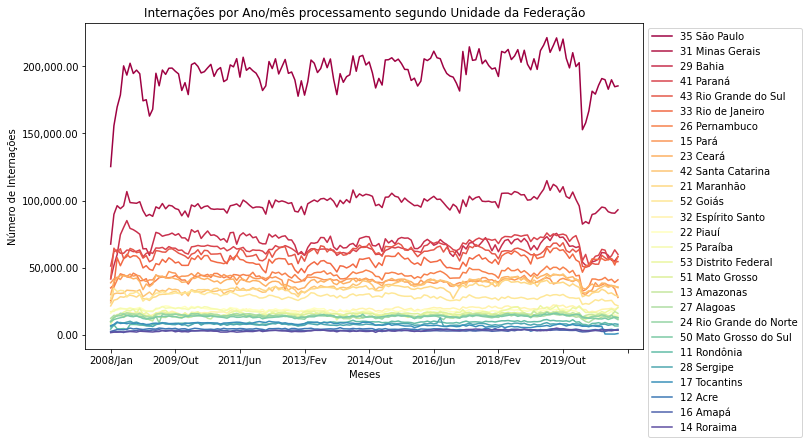

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import OrderedDict
cmaps = OrderedDict()
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
ax = ordenado_por_total.T.plot(xlabel="Meses",ylabel='Número de Internações', figsize=(10,6),cmap = cmaps['Diverging'][8])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação")
plt.show()

Vamos dar uma olhada nos 5 primeiros estados com maior número de internações. A surpresa é o estado do Rio de Janeiro não estar entre os 5 primeiros uma vez que é o terceiro maior estado do país.

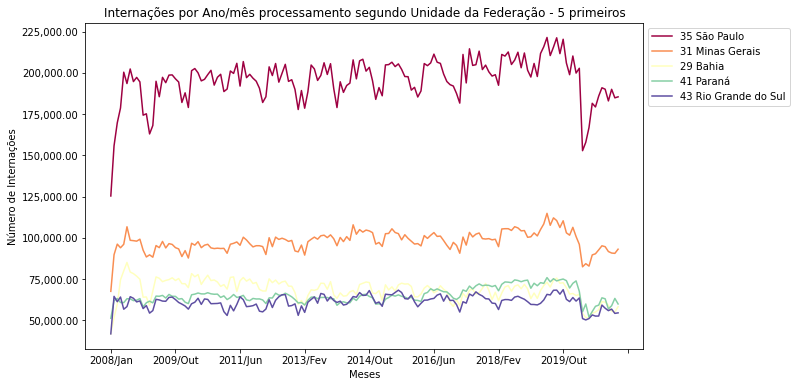

In [ ]:
ax = ordenado_por_total[:5].T.plot(xlabel="Meses",ylabel='Número de Internações', figsize=(10,6),cmap = cmaps['Diverging'][8])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação - 5 primeiros")
plt.show()

Olhando os gráficos acima percebemos uma certa sazonalidade geral, pois o gráfico apresenta subidas e descidas bem parecidas entre os estados, podemos inferir que determinados meses do ano o número de internações aumenta e diminui seguindo uma tendência nacional.

###**3.2 Verificar se o comportamento da região sudeste é diferente do comportamento nacional**

Vamos plotar o gráfico somente dos estados da região sudeste e verificar o comportamento.

In [ ]:
sudeste = ordenado_por_total.loc[["35 São Paulo","31 Minas Gerais","33 Rio de Janeiro","32 Espírito Santo"]]
sudeste

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,125361,155799,169738,178746,200439,193555,202386,194738,197277,194543,174370,175203,162995,168100,194928,185550,197319,194082,198671,198792,196425,194467,182073,187926,179027,201359,202648,200028,195168,196112,198949,201568,192603,197354,199177,188683,190234,201161,199692,205824,...,198083,198912,192503,211205,210204,212696,205117,207804,212547,203113,212083,201634,197493,205741,197814,211776,215876,221498,210518,215641,221298,211684,220411,206022,198920,210257,199907,202819,152829,157924,166893,181563,179353,185941,190986,190114,183014,190050,184880,185488
31 Minas Gerais,67509,89738,96161,93949,96064,106686,98481,98257,97953,99139,92486,88366,89661,88228,95288,94012,97785,93841,96457,95970,94019,93239,88630,92208,87723,96678,95532,97640,94005,95503,96049,93876,93454,93686,93491,93602,90607,96079,96643,97470,...,98755,99108,94610,105344,105513,105513,104455,106719,105993,104207,104381,100308,100591,102961,101140,105009,108390,114829,107579,112079,110444,106238,110323,103008,101580,106343,100741,96006,82408,84302,82822,89609,90306,92662,95140,94602,91661,90748,90551,93083
33 Rio de Janeiro,34859,37109,57367,51389,56472,59898,57557,58857,58606,56302,49743,51433,48788,47877,52967,52141,56148,53924,57288,55717,53431,54201,51699,51612,51700,57183,56016,58960,56008,58913,59001,55198,54520,53828,53532,52913,53990,56447,57134,59386,...,53294,56146,52429,58584,60348,61332,59984,62421,61022,58775,59387,57284,52664,60470,56642,57486,58096,64714,61067,64299,64627,62705,63322,60465,56886,60098,55735,54244,46540,51363,51922,56539,56125,56059,56738,55323,56003,56574,51919,58362
32 Espírito Santo,9502,12962,15098,15108,13899,15902,16705,15869,16617,16591,15678,14145,13883,14803,16113,16696,17488,16443,16467,17462,16650,15761,14804,16109,14741,15731,15037,16543,16116,16436,16125,16952,16990,16784,16860,16966,16037,17964,17273,18587,...,20115,21094,19802,19599,21100,21471,20343,20408,20517,19575,20143,19328,18887,19382,19010,19289,19520,20534,20038,22164,21816,21348,21970,20118,21112,21505,20213,20550,18792,18685,16484,17393,16882,17759,18806,19089,19233,19687,18851,20065


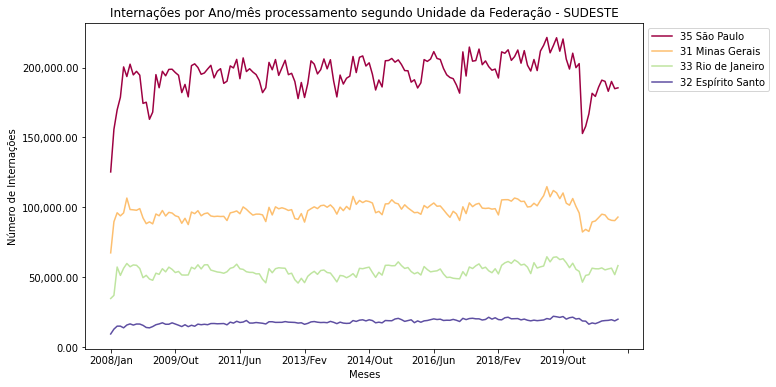

In [ ]:
ax = sudeste.T.plot(xlabel="Meses",ylabel='Número de Internações', figsize=(10,6),cmap = cmaps['Diverging'][8])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação - SUDESTE")
plt.show()

É observado que o comportamento dos estados da região sudeste são bem parecidos assim como quando comparamos nacionalmente, há uma certa tendência nacional.

###**3.3 Verificar se a pandemia teve impacto no número de internações**

Porém, em abril de 2020 é observado uma queda no número de internações, coincidindo com o inicio da pandemia no Brasil onde começaram a aparecer os primeiros casos e o inicio do isolamento social.

Número de internações dos ultimos 13 meses (Março/2020 até Março/2021) da região sudeste

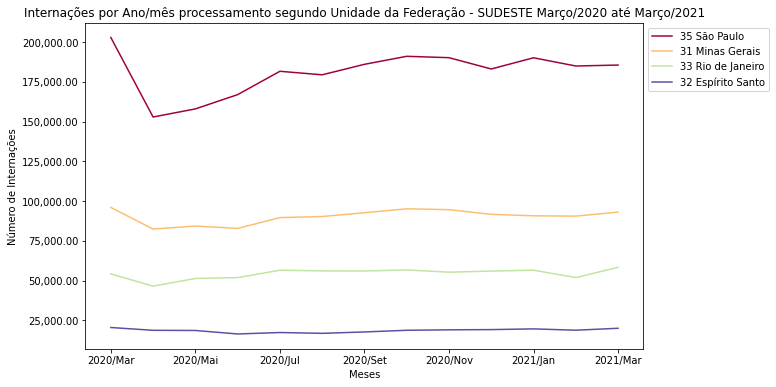

In [ ]:
ax = sudeste[sudeste.columns[-13:]].T.plot(xlabel="Meses",ylabel='Número de Internações', figsize=(10,6),cmap = cmaps['Diverging'][8])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação - SUDESTE Março/2020 até Março/2021")
plt.show()

E abaixo o gráfico de todas as regiões dos ultimos 13 meses (Março/2020 até Março/2021)



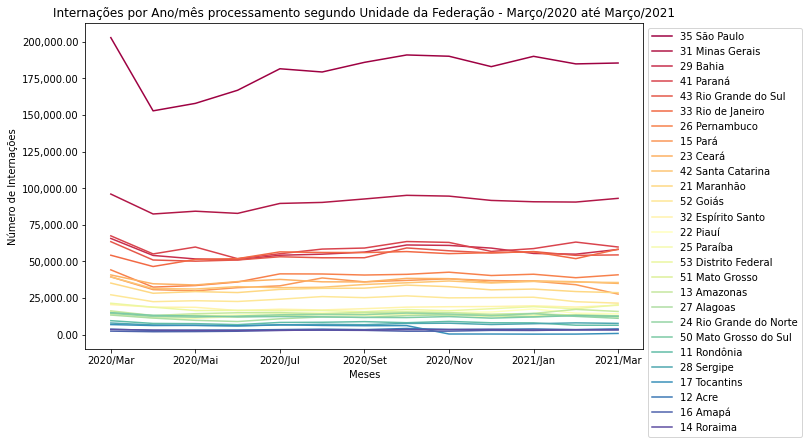

In [ ]:
ax = ordenado_por_total[ordenado_por_total.columns[-13:]].T.plot(xlabel="Meses",ylabel='Número de Internações', figsize=(10,6),cmap = cmaps['Diverging'][8])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação - Março/2020 até Março/2021")
plt.show()

Pode ser que essa queda do número de internações em abril de 2020 seja resultado do isolamento social iniciado em março de 2020 devido a pandemia, conforme https://www.sanarmed.com/linha-do-tempo-do-coronavirus-no-brasil.

Em maio de 2020 já percebe-se um aumento do número de internações e esse número se mantém estável, mesmo com o número crescente de internações devido a covid. Uma hipótese que podemos levantar é que enquanto há um aumento no número de internações devido ao covid ao mesmo tempo há uma diminuição de internações devido a outras doenças.

###**3.4 Verificar os gastos por estado**

Abaixo um gráfico com a média de gastos por estado.

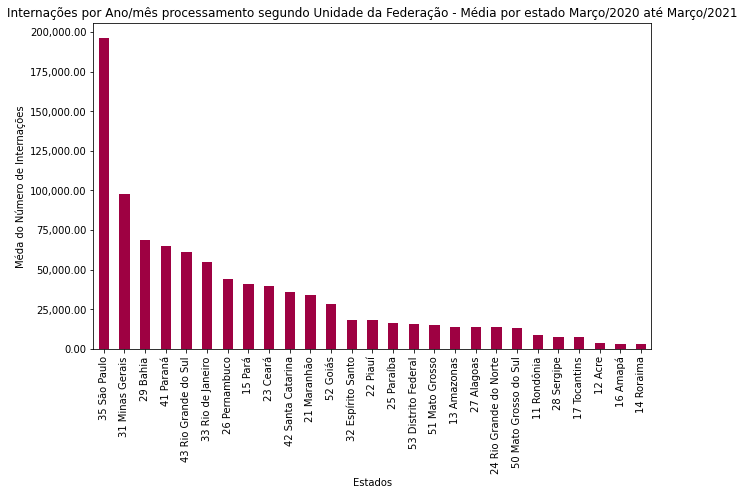

In [ ]:
ax = ordenado_por_total.T.mean().sort_values(ascending=False).plot(xlabel="Estados",ylabel='Méda do Número de Internações', figsize=(10,6),cmap = cmaps['Diverging'][8],kind = 'bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação - Média por estado Março/2020 até Março/2021")
ax.legend().set_visible(False)
plt.show()

Olhando esse resultado verificamos que a média de gastos por estado segue a ordem dos estados segundo o número de internações.

###**3.5 Comparando o estado de São Paulo com outros estados**

Agora fazendo uma comparação entre o número de internações do estado de São Paulo com outros, em porcentagem.

In [ ]:
sp_ref = ordenado_por_total.T.mean()/ordenado_por_total.loc["35 São Paulo"].T.mean()

In [ ]:
sp_ref

Unidade da Federação
35 São Paulo              1.000000
31 Minas Gerais           0.499761
29 Bahia                  0.349463
41 Paraná                 0.332398
43 Rio Grande do Sul      0.311649
33 Rio de Janeiro         0.279496
26 Pernambuco             0.225015
15 Pará                   0.207849
23 Ceará                  0.203529
42 Santa Catarina         0.183962
21 Maranhão               0.172600
52 Goiás                  0.145454
32 Espírito Santo         0.093057
22 Piauí                  0.092147
25 Paraíba                0.083303
53 Distrito Federal       0.082172
51 Mato Grosso            0.077772
13 Amazonas               0.072206
27 Alagoas                0.071834
24 Rio Grande do Norte    0.070357
50 Mato Grosso do Sul     0.068630
11 Rondônia               0.044564
28 Sergipe                0.039286
17 Tocantins              0.037773
12 Acre                   0.020583
16 Amapá                  0.015361
14 Roraima                0.014957
dtype: float64

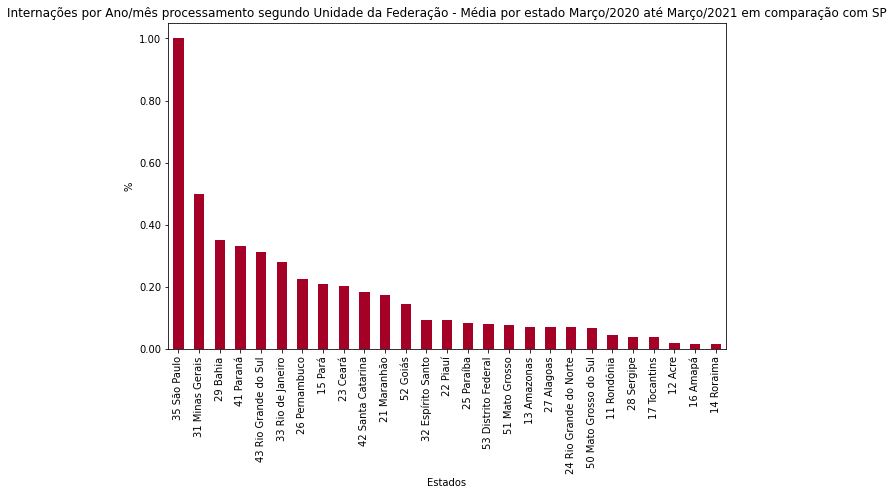

In [ ]:
ax = sp_ref.T.sort_values(ascending=False).plot(xlabel="Estados",ylabel='%', figsize=(10,6),cmap = cmaps['Diverging'][7],kind = 'bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Internações por Ano/mês processamento segundo Unidade da Federação - Média por estado Março/2020 até Março/2021 em comparação com SP")
ax.legend().set_visible(False)
plt.show()

Por exemplo, na média, o estado de Minas Gerais teve cerca de metade  das internações em comparação com o estado de São Paulo, o que vai de encontro com o número de habitantes de cada estado, onde em Minas Gerais tem se um pouco menos da metade do estado de São Paulo.

##**4 Conclusão**

- Com base nos dados verificamos que como esperado o estado de São Paulo é o estado onde teve o maior número de internações no periodo de 2008 a 2021 e consequentemente o que mais gastou, porém vimos que ele é também o estado mais populoso do Brasil.
- Verificamos também que o comportamento no número de internações da região Sudeste é parecida com outras regiões, aliás todos os estados apresenta uma dinâmica bem similar. Há também uma certa sazonalidade, onde os números de internações do todos os estados aumentam ou diminuem dependendo da época do ano.
- Verificamos também que logo no inicio da pandemia, no periodo onde se começou o isolamento social, teve uma queda no número de internações em todos os estados, porém logo em seguida essse número teve uma crescente e permaneceu estável. Uma hipótese do porquê desse número permanecer estável apesar do aumento do número de internações devido ao covid é que pode ser que tenha havido uma diminuição no número de internações devido a outras doenças.

##**5 Referências**

- http://www2.datasus.gov.br/DATASUS/index.php?area=02
- http://www2.datasus.gov.br/DATASUS/APRESENTACAO/TABNET/Tutorial_tabNet_FINAL.pptx_html/html/index.html#2
- https://www.sanarmed.com/linha-do-tempo-do-coronavirus-no-brasil
- https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o